In [39]:
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid', context = 'notebook', palette = 'deep')

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [40]:
data = pd.read_csv('/Users/alyssa/Documents/FTW/Day_5/LAB/nyc-rolling-sales.csv')

In [82]:
price = 'SALE PRICE'
gross = 'GROSS SQUARE FEET'
land = 'LAND SQUARE FEET'
date = 'SALE DATE'
built = 'YEAR BUILT'
age = 'AGE OF BUILDING'
residential = 'RESIDENTIAL UNITS'
build_class = 'BUILDING CLASS CATEGORY'
total = 'TOTAL UNITS'
commercial = 'COMMERCIAL UNITS'
zip_code = 'ZIP CODE'

In [81]:
data.columns

Index(['Unnamed: 0', 'NEIGHBORHOOD', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'AGE OF BUILDING', 'BOROUGH_Bronx',
       'BOROUGH_Brooklyn', 'BOROUGH_Manhattan', 'BOROUGH_Queens',
       'BOROUGH_Staten Island',
       'BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                    ',
       'BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                    ',
       'BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                  ',
       'BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                      ',
       'BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND                 ',
       'BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER                     ',


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [43]:
data[location] = data[location].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'})

In [44]:
data[price] = pd.to_numeric(data[price], errors = 'coerce')
data[gross] = pd.to_numeric(data[gross], errors = 'coerce')
data[land] = pd.to_numeric(data[land], errors = 'coerce')
data[date] = pd.to_datetime(data[date], errors = 'coerce')

In [45]:
data = data.drop_duplicates(data.columns, keep = 'last')

In [46]:
data = data[data[land].notnull()]
data = data[data[gross].notnull()]
data = data[data[price].notnull()]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        48244 non-null int64
BOROUGH                           48244 non-null object
NEIGHBORHOOD                      48244 non-null object
BUILDING CLASS CATEGORY           48244 non-null object
TAX CLASS AT PRESENT              48244 non-null object
BLOCK                             48244 non-null int64
LOT                               48244 non-null int64
EASE-MENT                         48244 non-null object
BUILDING CLASS AT PRESENT         48244 non-null object
ADDRESS                           48244 non-null object
APARTMENT NUMBER                  48244 non-null object
ZIP CODE                          48244 non-null int64
RESIDENTIAL UNITS                 48244 non-null int64
COMMERCIAL UNITS                  48244 non-null int64
TOTAL UNITS                       48244 non-null int64
LAND SQUARE FEET                  48244 non-null float64
G

In [48]:
data = data[(data[price] > 100_000) & (data[price] < 5_000_000)]
data = data[data[built] > 0]
data[age] = 2019 - data[built]
data = data[(data[total] > 0) & (data[total] < 60)]
data = data[data[total] == data[commercial] + data[residential]]

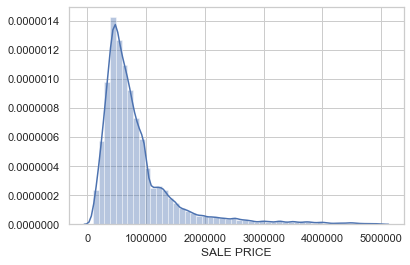

In [49]:
hist = sns.distplot(data[price])

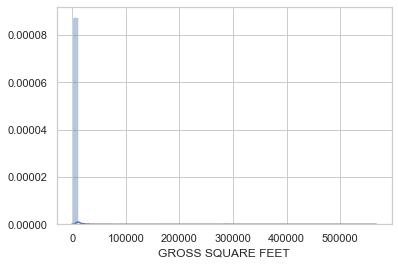

In [50]:
hist = sns.distplot(data[gross])

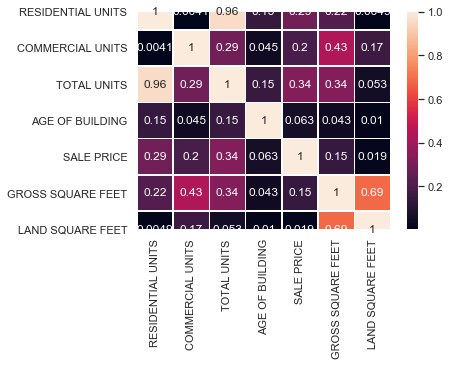

In [51]:
d = data[[residential, commercial, total, age, price, gross, land]]
corr = d.corr()
sns.heatmap(corr, square = True, linewidth = .5, annot = True)

In [52]:
data[commercial] = data[commercial] + 1
data[residential] = data[residential] + 1
data[gross] = data[gross] + 1
data[land] = data[land] + 1
data[age] = data[age] + 1

data[price] = StandardScaler().fit_transform(np.log(data[price]).values.reshape(-1,1))
data[commercial] = StandardScaler().fit_transform(np.log(data[commercial]).values.reshape(-1,1))
data[residential] = StandardScaler().fit_transform(np.log(data[residential]).values.reshape(-1,1))
data[gross] = StandardScaler().fit_transform(np.log(data[gross]).values.reshape(-1,1))
data[land] = StandardScaler().fit_transform(np.log(data[land]).values.reshape(-1,1))
data[age] = StandardScaler().fit_transform(np.log(data[age]).values.reshape(-1,1))

data[price] = StandardScaler().fit_transform(np.log(data[price]).values.reshape(-1,1))

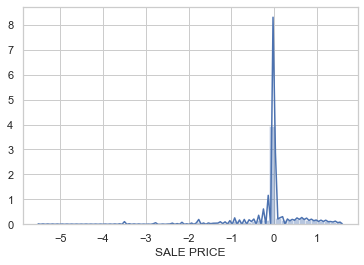

In [53]:
data[price] = data[price].fillna(0)
data[price].isna().sum()
sns.distplot(data[price])

In [54]:
one_hot_data = [location, build_class]

one_hot_encoded = pd.get_dummies(data[one_hot_data])
one_hot_encoded.info(verbose=True, null_counts=True)
data = data.drop(one_hot_data, axis=1)
data = pd.concat([data, one_hot_encoded], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29841 entries, 3 to 84545
Data columns (total 36 columns):
BOROUGH_Bronx                                                           29841 non-null uint8
BOROUGH_Brooklyn                                                        29841 non-null uint8
BOROUGH_Manhattan                                                       29841 non-null uint8
BOROUGH_Queens                                                          29841 non-null uint8
BOROUGH_Staten Island                                                   29841 non-null uint8
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         29841 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         29841 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       29841 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           29841 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND    

In [74]:
columns = [location, commercial, residential, gross, land, age, build_class, price]
data_mod = data.loc[:,columns]

In [88]:
features = [commercial, residential, gross, land, age]
X = data[features]

In [90]:
y = data[price]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [57]:
df_train = training.loc[:,data_mod.columns]
X_train = df_train.drop([price], axis=1)
y_train = df_train.loc[:, [price]]

df_test = testing.loc[:,data_mod.columns]
X_test = df_test.drop([price], axis=1)
y_test = df_test.loc[:, [price]]

In [65]:
data[zip_code] = pd.to_numeric(data[zip_code], errors = 'coerce')
data[zip_code] = data[zip_code].fillna(0)
data[zip_code].isna().sum()

0

In [72]:
data[commercial] = pd.to_numeric(data[commercial], errors = 'coerce')
data[commercial] = data[commercial].fillna(0)
data[commercial].isna().sum()

0

In [70]:
data[residential] = pd.to_numeric(data[residential], errors = 'coerce')
data[residential] = data[residential].fillna(0)
data[residential].isna().sum()

data[age] = pd.to_numeric(data[age], errors = 'coerce')
data[age] = data[age].fillna(0)
data[age].isna().sum()

0

In [69]:
data[gross] = pd.to_numeric(data[gross], errors = 'coerce')
data[gross] = data[gross].fillna(0)
data[gross].isna().sum()

data[land] = pd.to_numeric(data[land], errors = 'coerce')
data[land] = data[land].fillna(0)
data[land].isna().sum()

0

In [75]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()

X = data_mod.drop([price], axis=1)
y = data_mod.loc[:, price]

coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 5)

In [93]:
ridgecv = RidgeCV(alphas=alphas)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

16.372745814388658

In [101]:
ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)

ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

ridge_cv = cross_val_score(ridge, X_train, y_train, cv=5)
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv)))
print(ridge_cv)

ridge.fit(X,y)
pd.Series(ridge.coef_, index=X.columns)

R^2: 0.004777933978633686
Root Mean Squared Error: 0.6788341687858955
Average 5-Fold CV Score: 0.004518888099921114
[0.0050548  0.00456733 0.00437817 0.00404411 0.00455002]


COMMERCIAL UNITS     0.006632
RESIDENTIAL UNITS    0.004178
GROSS SQUARE FEET   -0.000492
LAND SQUARE FEET    -0.002524
AGE OF BUILDING      0.000231
dtype: float64

In [96]:
ridge.score(X_test, y_test)

0.004860801743009957

In [99]:
y_predicted = ridge.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)

0.46077745860388347